In [1]:
!pip install requests beautifulsoup4 pandas

In [82]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("scraped_books_data.csv")
df.head()

,Book_Name,Book_Price,Book_Rating,Price_Range,Rating_Category
0,It's Only the Himalayas,45.17,2,Expensive,Low
1,Full Moon over Noahâs,49.43,4,Expensive,High
2,See America: A Celebration,48.87,3,Expensive,Average
3,Vagabonding: An Uncommon Guide,36.94,2,Medium,Low
4,Under the Tuscan Sun,37.33,3,Medium,Average


In [84]:
df.shape

(517, 5)

In [85]:
df.columns

Index(['Book_Name', 'Book_Price', 'Book_Rating', 'Price_Range',
       'Rating_Category'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Book_Name        517 non-null    object 
 1   Book_Price       517 non-null    float64
 2   Book_Rating      517 non-null    int64  
 3   Price_Range      517 non-null    object 
 4   Rating_Category  517 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.3+ KB


In [87]:
df = df.drop_duplicates()

In [88]:
df.describe()

,Book_Price,Book_Rating
count,517.000000,517.000000
mean,35.315068,2.897485
std,14.341524,1.454455
min,10.010000,1.000000
25%,22.540000,2.000000
50%,36.260000,3.000000
75%,48.190000,4.000000
max,59.990000,5.000000


In [89]:
df["Book_Price"].mean()

np.float64(35.315067698259185)

In [90]:
df["Book_Rating"].value_counts().sort_index()

Book_Rating
1    122
2    105
3     98
4     88
5    104
Name: count, dtype: int64

In [91]:
df.isnull().sum()

Book_Name          0
Book_Price         0
Book_Rating        0
Price_Range        0
Rating_Category    0
dtype: int64

In [92]:
df.sort_values(by="Book_Price",ascending = False).head(6)

,Book_Name,Book_Price,Book_Rating,Price_Range,Rating_Category
118,The Perfect Play (Play,59.99,3,Expensive,Average
372,Civilization and Its Discontents,59.95,2,Expensive,Low
481,The Bone Hunters (Lexy,59.71,3,Expensive,Average
416,Thomas Jefferson and the,59.64,1,Expensive,Low
25,Boar Island (Anna Pigeon,59.48,3,Expensive,Average
381,Life Without a Recipe,59.04,5,Expensive,High


In [93]:
df.groupby('Book_Rating')['Book_Price'].mean()

Book_Rating
1    34.234508
2    35.869333
3    36.064184
4    34.757159
5    35.789231
Name: Book_Price, dtype: float64

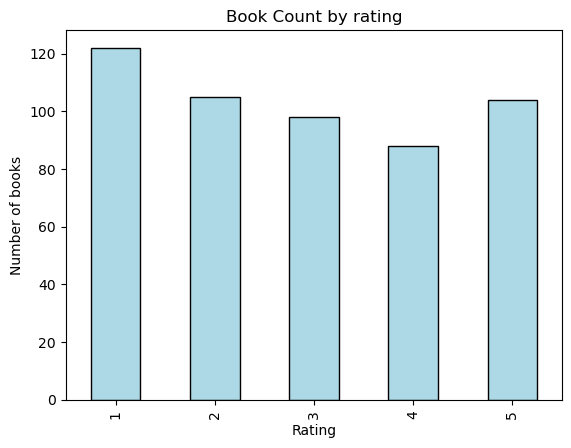

In [94]:
df["Book_Rating"].value_counts().sort_index().plot(kind = "bar",color = 'lightblue',edgecolor = 'black')
plt.xlabel("Rating")
plt.ylabel("Number of books")
plt.title("Book Count by rating")
plt.show()

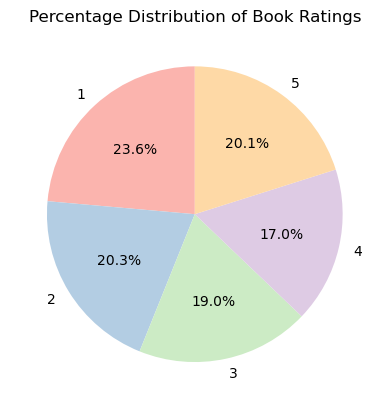

In [97]:
rating_counts = df["Book_Rating"].value_counts().sort_index()
plt.figure()
rating_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90,colors = plt.cm.Pastel1.colors)
plt.ylabel("")
plt.title("Percentage Distribution of Book Ratings")
plt.show()

In [98]:
url = "https://books.toscrape.com/catalogue/page-1.html"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

In [99]:
titles = []
prices = []
Book_Name = soup.find_all("article", class_="product_pod")
for Book_Name in Book_Name:
    title = Book_Name.h3.a["title"]
    price = Book_Name.find("p", class_="price_color").text
    price = price.replace("Â£", "").strip()
    price = float(price)
    titles.append(title)
    prices.append(price)

In [100]:
prices[:8]

[51.77, 53.74, 50.1, 47.82, 54.23, 22.65, 33.34, 17.93]

In [102]:
df.to_csv("scraped_books_data_cleaned.csv", index=False)
print("Dataset Cleaned Successfully!!")

Dataset Cleaned Successfully!!
